TensorFlow versión: 2.19.0
Train shape: (60000, 785)
Test shape:  (10000, 785)
Shapes antes de remodelar:
  X_train: (60000, 784)
  y_train: (60000,)
  X_test:  (10000, 784)
  y_test:  (10000,)
Shapes después de remodelar:
  X_train: (60000, 28, 28, 1)
  X_test:  (10000, 28, 28, 1)


c:\Users\Mgh59\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6806 - loss: 0.8954 - val_accuracy: 0.8553 - val_loss: 0.4027
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8423 - loss: 0.4349 - val_accuracy: 0.8765 - val_loss: 0.3350
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8667 - loss: 0.3681 - val_accuracy: 0.8912 - val_loss: 0.2946
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8789 - loss: 0.3365 - val_accuracy: 0.8957 - val_loss: 0.2815
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8871 - loss: 0.3090 - val_accuracy: 0.9028 - val_loss: 0.2627
Modelo guardado en: C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Clasificasion de Imagenes - TensorFlow/fashion_mnist_cnn_model.keras
79/79 - 0s - 3ms/step - accuracy: 0.9028 - loss: 0.2627
Evaluación (loss, accuracy): [0.26265671849250793, 0.9028000235557556]


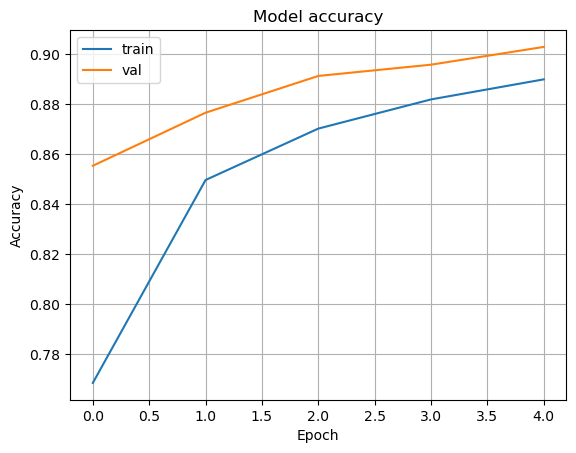

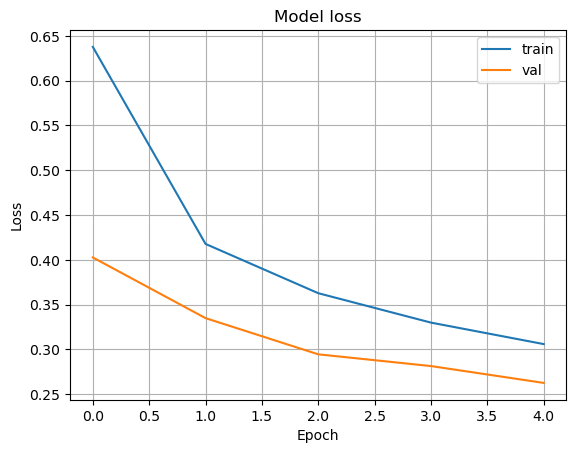

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
    idx  true_label  pred_label
0     0           0           0
1     1           1           1
2     2           2           2
3     3           2           6
4     4           3           3
5     5           2           6
6     6           8           8
7     7           6           6
8     8           5           5
9     9           0           0
10   10           3           3
11   11           4           2


In [ ]:
# train_fashion_mnist.py
# Script para entrenar una CNN en Fashion-MNIST a partir de CSVs.

import os
import sys
import numpy as np
import pandas as pd


try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
except Exception as e:
    print("ERROR: TensorFlow no está instalado en este entorno.")
    print("Instálalo con: pip install tensorflow")
    raise

print("TensorFlow versión:", tf.__version__)

# Rutas a los CSV subidos
train_path = r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Clasificasion de Imagenes - TensorFlow\dataset\train\fashion-mnist_train.csv"
test_path  = r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Clasificasion de Imagenes - TensorFlow\dataset\test\fashion-mnist_test.csv"

# Cargar con pandas
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print(f"Train shape: {train_df.shape}")
print(f"Test shape:  {test_df.shape}")

# ---------- Preprocesamiento ----------
# Detectamos la columna de label automáticamente
if 'label' in train_df.columns:
    y_train = train_df['label'].to_numpy()
    X_train = train_df.drop(columns=['label']).to_numpy()
else:
    y_train = train_df.iloc[:,0].to_numpy()
    X_train = train_df.iloc[:,1:].to_numpy()

if 'label' in test_df.columns:
    y_test = test_df['label'].to_numpy()
    X_test = test_df.drop(columns=['label']).to_numpy()
else:
    y_test = test_df.iloc[:,0].to_numpy()
    X_test = test_df.iloc[:,1:].to_numpy()

# Mostrar shapes antes de remodelar
print("Shapes antes de remodelar:")
print("  X_train:", X_train.shape)
print("  y_train:", y_train.shape)
print("  X_test: ", X_test.shape)
print("  y_test: ", y_test.shape)

# Convertir a float32 y normalizar píxeles a [0,1]
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0

# Remodelar a (n, 28, 28, 1) ya que Fashion-MNIST son imágenes 28x28 escala de grises
img_rows, img_cols = 28, 28
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test  = X_test.reshape(-1, img_rows, img_cols, 1)

print("Shapes después de remodelar:")
print("  X_train:", X_train.shape)
print("  X_test: ", X_test.shape)

# Convertir etiquetas a enteros si no lo están
y_train = y_train.astype('int64')
y_test  = y_test.astype('int64')

# ---------- Crear tf.data.Dataset ----------
batch_size = 128
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ---------- Definir modelo CNN ----------
num_classes = len(np.unique(y_train))

def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_rows, img_cols, 1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.summary()

# ---------- Compilar ----------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping para detener si no hay mejora en val_loss
callbacks = [ keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) ]

# ---------- Entrenar ----------
epochs = 5  
history = model.fit(train_ds, epochs=epochs, validation_data=test_ds, callbacks=callbacks)

# Guardar modelo 
model_save_path = r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Clasificasion de Imagenes - TensorFlow/fashion_mnist_cnn_model.keras"
model.save(model_save_path)
print("Modelo guardado en:", model_save_path)

# Evaluación final
eval_results = model.evaluate(test_ds, verbose=2)
print("Evaluación (loss, accuracy):", eval_results)

# ---------- Graficar métricas (un gráfico por figura) ----------
import matplotlib.pyplot as plt

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.grid(True)
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.grid(True)
plt.show()

# ---------- Predicciones de ejemplo ----------
sample_images = X_test[:12]
sample_labels = y_test[:12]
pred_probs = model.predict(sample_images)
pred_classes = np.argmax(pred_probs, axis=1)

import pandas as pd
results_df = pd.DataFrame({
    'idx': np.arange(12),
    'true_label': sample_labels,
    'pred_label': pred_classes
})
print(results_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


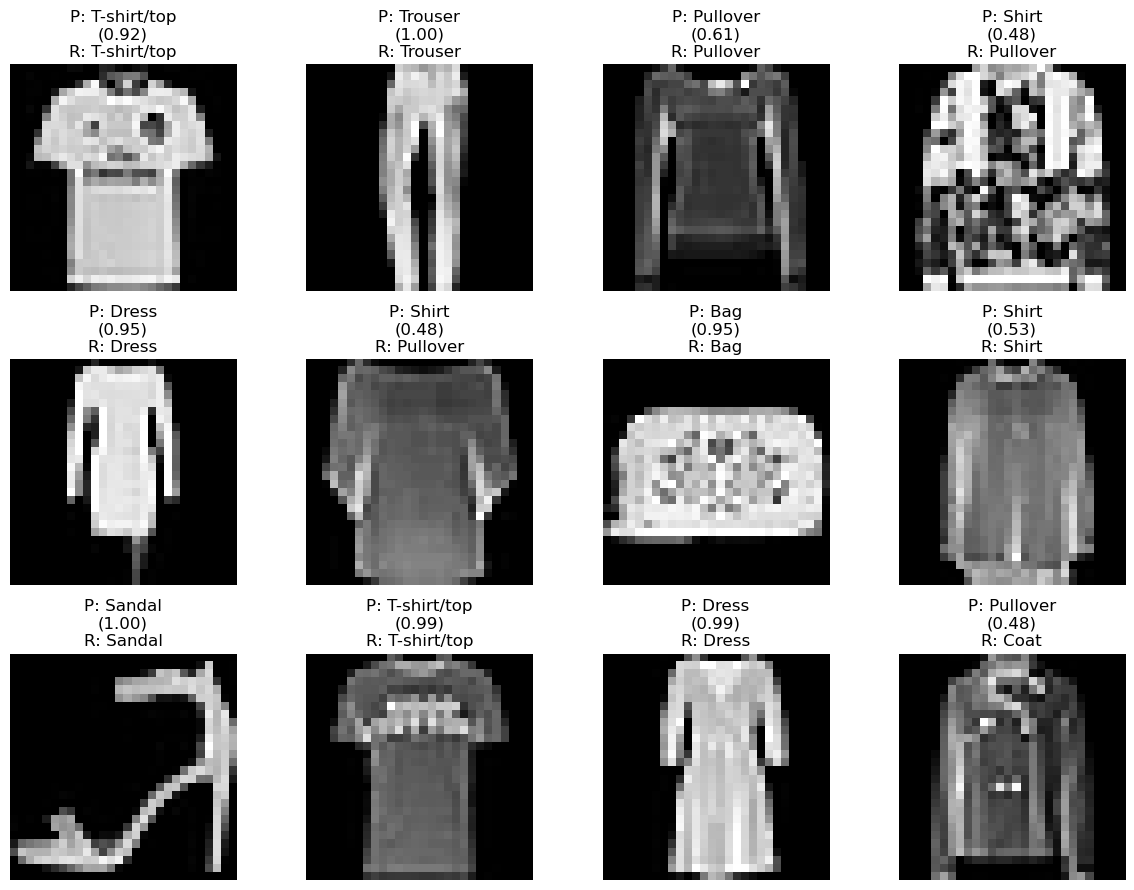

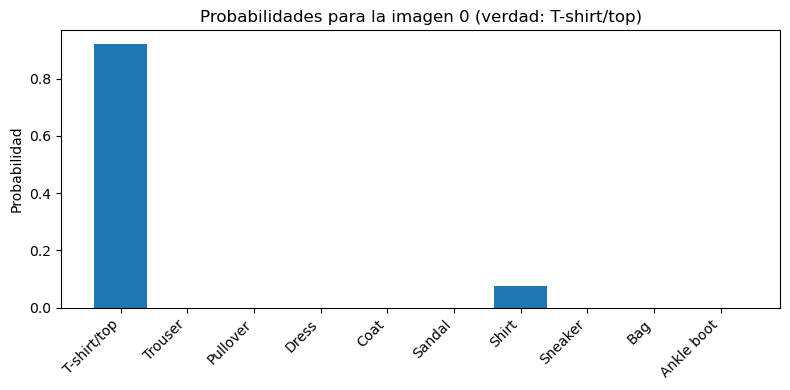

In [ ]:
# Mostrar imágenes del test con predicción y etiqueta real
# - X_test: array shape (N,28,28,1) normalizado (0-1)
# - y_test: array shape (N,)

# Import necesario
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Mapa de nombres de clases de Fashion-MNIST
class_names = [
    "T-shirt/top (remera)", "Trouser (pantalón)", "Pullover (suéter)", "Dress (vestido)",
    "Coat (abrigo)", "Sandal (sandalia)", "Shirt (camisa)", "Sneaker (zapatilla)",
    "Bag (bolso)", "Ankle boot (botín)"
]

# Tomar una muestra de N imágenes del test 
N = 12
sample_images = X_test[:N]           # N imágenes (shape: N,28,28,1)
sample_labels = y_test[:N]           # etiquetas verdaderas

# Calcular predicciones (probabilidades) y clases predichas
pred_probs = model.predict(sample_images)  
pred_classes = np.argmax(pred_probs, axis=1)

# Mostrar un grid con imagen + predicción + etiqueta real + probabilidad
cols = 4
rows = int(np.ceil(N / cols))
plt.figure(figsize=(cols*3, rows*3))  

for i in range(N):
    ax = plt.subplot(rows, cols, i+1)
    # La imagen está en formato (28,28,1) -> la convertimos a (28,28)
    img = sample_images[i].reshape(28,28)
    ax.imshow(img, cmap='gray')   # usar colormap por defecto de matplotlib
    true_label = sample_labels[i]
    pred_label = pred_classes[i]
    pred_prob = pred_probs[i][pred_label]
    ax.set_title(f"P: {class_names[pred_label].split(' (')[0]}\n({pred_prob:.2f})\nR: {class_names[true_label].split(' (')[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Mostrar ejemplo con barras de probabilidad 
i = 0  # índice de la imagen a mostrar
probs = pred_probs[i]
plt.figure(figsize=(8,4))
plt.bar(range(len(probs)), probs)
plt.xticks(range(len(probs)), [c.split(" (")[0] for c in class_names], rotation=45, ha='right')
plt.ylabel("Probabilidad")
plt.title(f"Probabilidades para la imagen {i} (verdad: {class_names[sample_labels[i]].split(' (')[0]})")
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


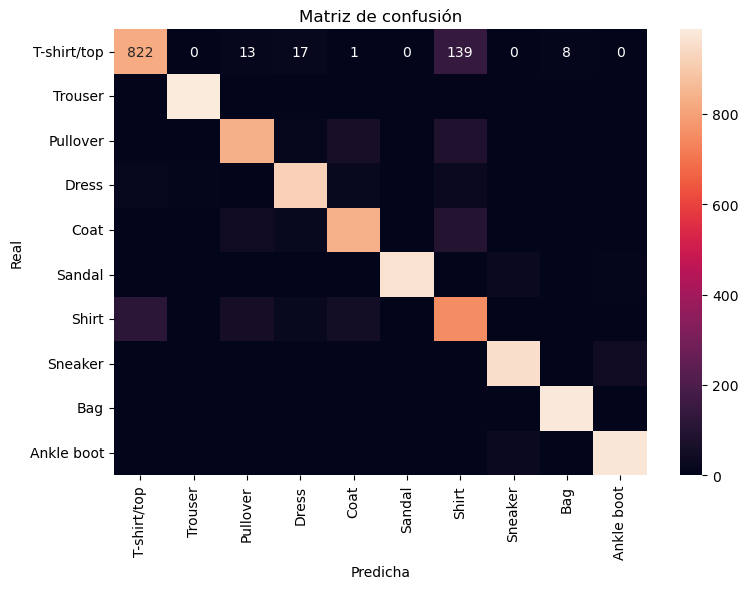

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.84      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.86      0.84      0.85      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.68      0.76      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Obtener predicciones para todo el set de test
all_pred_probs = model.predict(X_test)
all_pred = np.argmax(all_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, all_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[c.split(' (')[0] for c in class_names],
            yticklabels=[c.split(' (')[0] for c in class_names])
plt.xlabel('Predicha')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.tight_layout()
plt.show()

# Reporte por clase (precision, recall, f1)
print(classification_report(y_test, all_pred, target_names=[c.split(' (')[0] for c in class_names]))
